<a href="https://colab.research.google.com/github/jisusP/Articulo/blob/main/agrupamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.cluster import KMeans

# Datos de ejemplo
datos = [[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]]

# Crear el modelo de clustering
kmeans = KMeans(n_clusters=3)

# Ajustar el modelo a los datos
kmeans.fit(datos)

# Obtener las etiquetas de los clusters asignados a cada punto
etiquetas = kmeans.labels_

# Obtener los centroides de los clusters
centroides = kmeans.cluster_centers_

# Imprimir los resultados
print("Etiquetas de los clusters:", etiquetas)
print("Centroides de los clusters:", centroides)


Etiquetas de los clusters: [1 1 2 2 1 0]
Centroides de los clusters: [[ 9.         11.        ]
 [ 1.16666667  1.46666667]
 [ 6.5         8.        ]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [1]:
#Silueta
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Datos de ejemplo
datos_quinolinas = ["1 (62)","2 (>250)","3 (>250)","4 (62)","5 (125)","6 (>250)","7 (>250)","8 (125)","9 (250)","10 (>250)","11 (62)","12 (125)"]
datos_esteroides = ["5.322","9.114","9.176","7.462","7.146","6.342","6.204","6.431","7.819","7.380","7.204","9.740","8.832","6.633","8.176","6.146","7.146","6.362","6.944","6.996","9.204"]

# Algoritmo de K-Means
kmeans = KMeans(n_clusters=2)
etiquetas_kmeans = kmeans.fit_predict(datos_esteroides)
silueta_kmeans = silhouette_score(datos, etiquetas_kmeans)

# Algoritmo de DBSCAN
dbscan = DBSCAN(eps=1, min_samples=2)
etiquetas_dbscan = dbscan.fit_predict(datos)
silueta_dbscan = silhouette_score(datos, etiquetas_dbscan)

# Algoritmo de Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=2)
etiquetas_agglomerative = agglomerative.fit_predict(datos)
silueta_agglomerative = silhouette_score(datos, etiquetas_agglomerative)

# Imprimir los resultados
print("Coeficiente de Silueta (K-Means):", silueta_kmeans, etiquetas_kmeans)
print("Coeficiente de Silueta (DBSCAN):", silueta_dbscan, etiquetas_dbscan)
print("Coeficiente de Silueta (Agglomerative Clustering):", silueta_agglomerative, etiquetas_agglomerative)


ValueError: ignored

In [1]:
import pandas as pd

# Lista de strings original
lista_strings = ["1 (62)","2 (>250)","3 (>250)","4 (62)","5 (125)","6 (>250)","7 (>250)","8 (125)","9 (250)","10 (>250)","11 (62)","12 (125)"]
lista_strings_estero = ["5.322","9.114","9.176","7.462","7.146","6.342","6.204","6.431","7.819","7.380","7.204","9.740","8.832","6.633","8.176","6.146","7.146","6.362","6.944","6.996","9.204"]
lista_ordenada_estero = sorted(lista_strings_estero, key=float)
# Crear un DataFrame a partir de la lista de strings
datos = pd.DataFrame({"string": lista_strings})
datos_estero = pd.DataFrame({"string": lista_ordenada_estero})
datos_estero["Etiqueta"] = [i for i in range(1,len(lista_ordenada_estero)+1)]
print(lista_ordenada_estero)
# Realizar mapeo de las etiquetas a valores numéricos
mapeo = {
    "<=62": 1,
    "62-125": 2,
    "125-250": 3,
    ">250": 4
}
#mapeo2 = {x: i+1 for x in lista_strings_estero.sort(key=float)}

# Extraer los números de los strings
datos["numero"] = datos["string"].str.extract(r"(\d+)")
# Reemplazar las etiquetas por los valores numéricos correspondientes
#datos["etiqueta"] = datos["string"].str.extract(r"\((.+)\)").replace(mapeo)
datos["etiqueta"]=[1,4,4,1,2,4,4,2,3,4,1,2]
# Imprimir los datos transformados
#datos
datos_estero

['5.322', '6.146', '6.204', '6.342', '6.362', '6.431', '6.633', '6.944', '6.996', '7.146', '7.146', '7.204', '7.380', '7.462', '7.819', '8.176', '8.832', '9.114', '9.176', '9.204', '9.740']


,string,Etiqueta
0,5.322,1
1,6.146,2
2,6.204,3
3,6.342,4
4,6.362,5
5,6.431,6
6,6.633,7
7,6.944,8
8,6.996,9
9,7.146,10


In [2]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Datos con etiquetas transformadas
datos_transformados = datos["etiqueta"].values.reshape(-1, 1)
datos_transformados_estero = datos_estero["Etiqueta"].values.reshape(-1, 1)
# Algoritmo de K-Means
kmeans = KMeans(n_clusters=3)
etiquetas_kmeans = kmeans.fit_predict(datos_transformados_estero)
silueta_kmeans = silhouette_score(datos_transformados_estero, etiquetas_kmeans)

# Algoritmo de DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)
etiquetas_dbscan = dbscan.fit_predict(datos_transformados)
silueta_dbscan = silhouette_score(datos_transformados, etiquetas_dbscan)

# Algoritmo de Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=4)
etiquetas_agglomerative = agglomerative.fit_predict(datos_transformados)
silueta_agglomerative = silhouette_score(datos_transformados, etiquetas_agglomerative)

# Imprimir los resultados
print("Coeficiente de Silueta (K-Means):", silueta_kmeans, etiquetas_kmeans)
print("Coeficiente de Silueta (DBSCAN):", silueta_dbscan, etiquetas_dbscan)
print("Coeficiente de Silueta (Agglomerative Clustering):", silueta_agglomerative, etiquetas_agglomerative)


Coeficiente de Silueta (K-Means): 0.534800957420005 [1 1 1 1 1 1 1 0 0 0 0 0 0 0 2 2 2 2 2 2 2]
Coeficiente de Silueta (DBSCAN): 0.9166666666666666 [ 0  1  1  0  2  1  1  2 -1  1  0  2]
Coeficiente de Silueta (Agglomerative Clustering): 0.9166666666666666 [2 1 1 2 0 1 1 0 3 1 2 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [3]:
from sklearn.metrics import pairwise_distances

# Matriz de similaridad para K-Means
similarity_kmeans = pairwise_distances(datos_transformados_estero, metric='euclidean')

# Matriz de similaridad para DBSCAN
mask_dbscan = etiquetas_dbscan != -1  # Excluir puntos etiquetados como ruido
similarity_dbscan = pairwise_distances(datos_transformados, metric='euclidean')

# Matriz de similaridad para Agglomerative Clustering
mask_agglomerative = etiquetas_agglomerative != -1  # Excluir puntos etiquetados como ruido
similarity_agglomerative = pairwise_distances(datos_transformados[mask_agglomerative], metric='euclidean')

# Imprimir las matrices de similaridad
print("Matriz de similaridad (K-Means):")
print(similarity_kmeans)
print("\nMatriz de similaridad (DBSCAN):")
print(similarity_dbscan)
print("\nMatriz de similaridad (Agglomerative Clustering):")
print(similarity_agglomerative)


Matriz de similaridad (K-Means):
[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
  18. 19. 20.]
 [ 1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.
  17. 18. 19.]
 [ 2.  1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.
  16. 17. 18.]
 [ 3.  2.  1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.
  15. 16. 17.]
 [ 4.  3.  2.  1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.
  14. 15. 16.]
 [ 5.  4.  3.  2.  1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.
  13. 14. 15.]
 [ 6.  5.  4.  3.  2.  1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.
  12. 13. 14.]
 [ 7.  6.  5.  4.  3.  2.  1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.
  11. 12. 13.]
 [ 8.  7.  6.  5.  4.  3.  2.  1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9.
  10. 11. 12.]
 [ 9.  8.  7.  6.  5.  4.  3.  2.  1.  0.  1.  2.  3.  4.  5.  6.  7.  8.
   9. 10. 11.]
 [10.  9.  8.  7.  6.  5.  4.  3.  2.  1.  0.  1.  2.  3.  4.  5.  6.  7.
   

<ipython-input-37-ba8a1e2827e1>:8: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  d = shc.dendrogram(shc.linkage(similarity_kmeans, method = "ward"), labels = lab2)


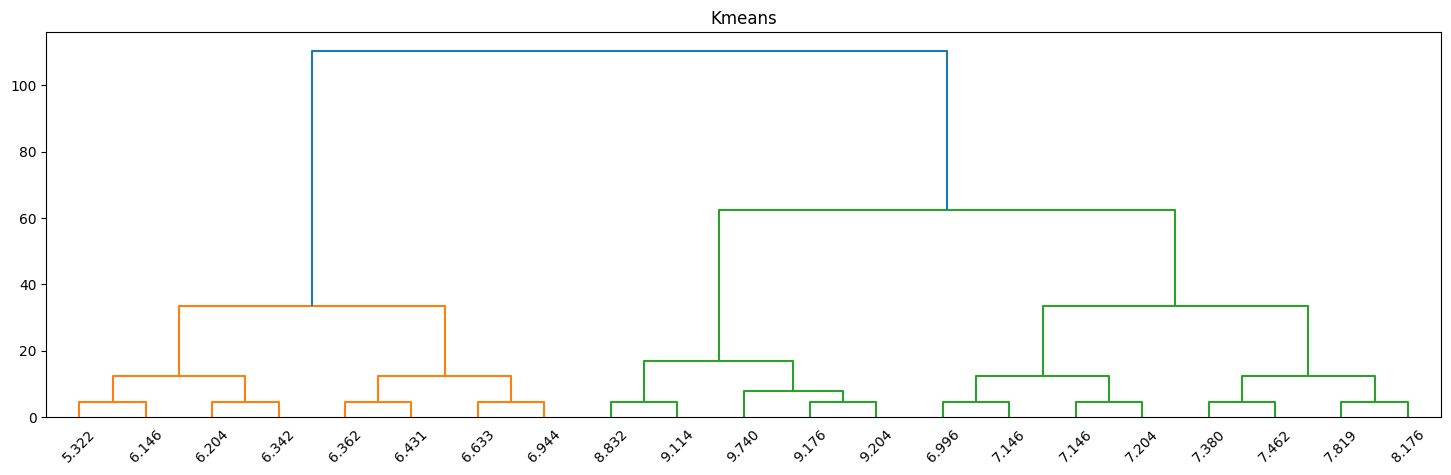

In [ ]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
lab = ["1 (62)","2 (>250)","3 (>250)","4 (62)","5 (125)","6 (>250)","7 (>250)","8 (125)","9 (250)","10 (>250)","11 (62)","12 (125)"]
lab2 = ["5.322","9.114","9.176","7.462","7.146","6.342","6.204","6.431","7.819","7.380","7.204","9.740","8.832","6.633","8.176","6.146","7.146","6.362","6.944","6.996","9.204"]
lab2 = sorted(lab2, key=float)
plt.figure(figsize=(18,5))
plt.title("Kmeans")
d = shc.dendrogram(shc.linkage(similarity_kmeans, method = "ward"), labels = lab2)

In [23]:
#print(similarity_kmeans)
prueba=similarity_kmeans.tolist()
print(prueba)

nombre = input("Escriba el nombre del arreglo: ")
with open(f"{nombre}.txt", 'w') as n:
  n.write(str(prueba))

[[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0], [1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0], [2.0, 1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0], [3.0, 2.0, 1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0], [4.0, 3.0, 2.0, 1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0], [5.0, 4.0, 3.0, 2.0, 1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0], [6.0, 5.0, 4.0, 3.0, 2.0, 1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0], [7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0], [8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.

<ipython-input-16-93c7f306aa26>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  d = shc.dendrogram(shc.linkage(similarity_dbscan, method = "ward"), labels = lab)


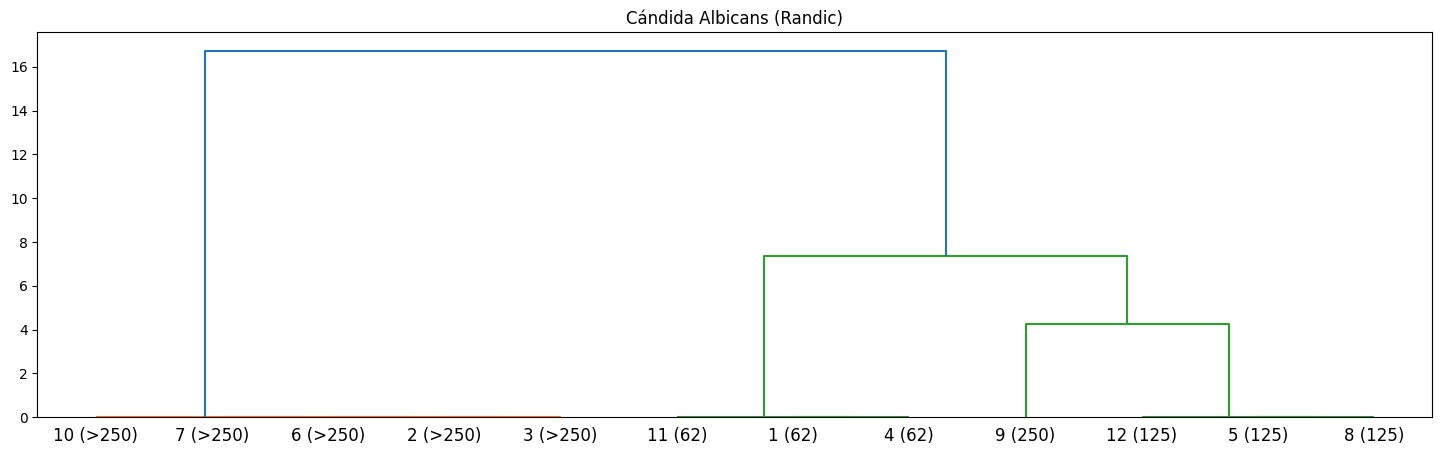

In [ ]:
plt.figure(figsize=(18,5))
plt.title("Cándida Albicans (Randic)")
d = shc.dendrogram(shc.linkage(similarity_dbscan, method = "ward"), labels = lab)

<ipython-input-17-c5a795636455>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  d = shc.dendrogram(shc.linkage(similarity_agglomerative, method = "ward"), labels = lab)


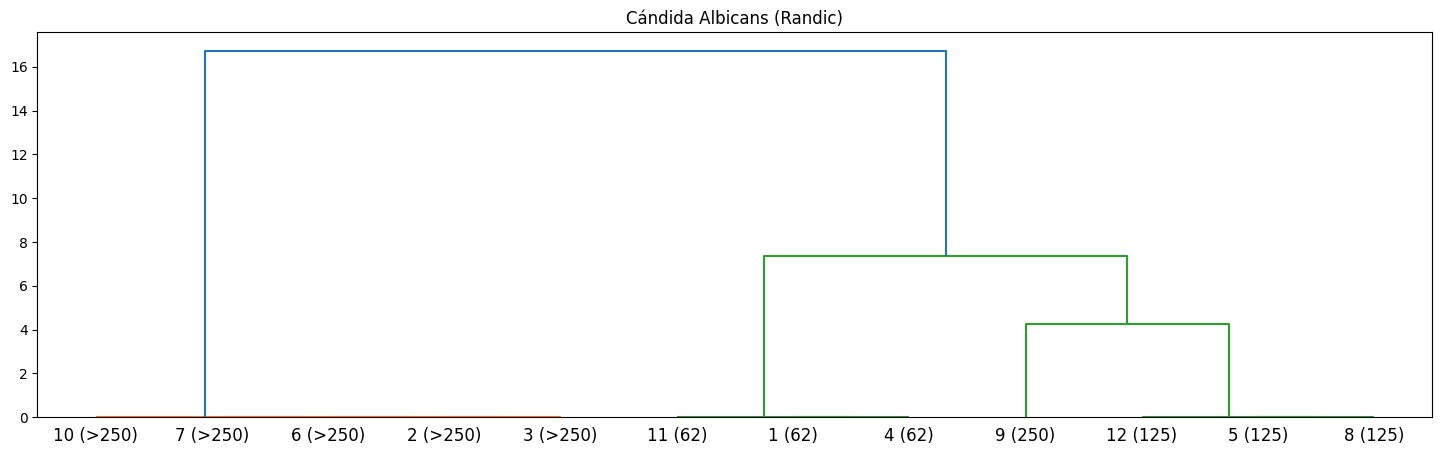

In [ ]:
plt.figure(figsize=(18,5))
plt.title("Cándida Albicans (Randic)")
d = shc.dendrogram(shc.linkage(similarity_agglomerative, method = "ward"), labels = lab)

In [25]:
import numpy as np
import pandas as pd
import glob
from natsort import natsorted
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from scipy.stats import pearsonr

def calcular_distancia_frobenius(matriz_referencia, matriz_comparacion):
    diferencia = matriz_referencia - matriz_comparacion
    distancia_frobenius = 1/(1+np.linalg.norm(diferencia))
    return distancia_frobenius

def calcular_correlacion_cophenet(matriz_referencia, matriz_comparacion):
    # Calcular el enlace jerárquico
    global Z_comparacion
    global Z_referencia
    Z_referencia = linkage(pdist(matriz_referencia), method='ward')
    Z_comparacion = linkage(pdist(matriz_comparacion), method='ward')

    # Calcular el coeficiente de correlación cofenético
    correlacion, dist_coph = cophenet(Z_referencia, pdist(matriz_comparacion))
    return correlacion

def calcular_correlacion_mantel(matriz_referencia, matriz_comparacion):
    # Calcula las distancias de Mantel
    distancia_referencia = pdist(matriz_referencia)
    distancia_comparacion = pdist(matriz_comparacion)

    # Calcula la correlación de Mantel entre las dos matrices de distancia
    correlacion, p_valor = pearsonr(distancia_referencia, distancia_comparacion)
    return correlacion

directorio = "/content/"
referencia = "Kmeans.txt"
#referencia = input("Ingrese el nombre de la matriz de referencia (terminado en .txt): ")
with open(directorio + referencia, 'r') as f:
    matriz_referencia_str = f.read()
    matriz_referencia = np.array(eval(matriz_referencia_str))
patron_txt = "*.txt"
matrices_txt = glob.glob(directorio + patron_txt)

print(type(matriz_referencia_str))
print(type(np.array(matriz_referencia_str)))
# Lista para almacenar las distancias
distancias_frobenius = []
coeficientes_cophenet  = []
correlaciones_mantel = []

for archivo in matrices_txt:
    with open(archivo, 'r') as f:
        matriz_comparacion_str = f.read()
        matriz_comparacion = np.array(eval(matriz_comparacion_str))
        #Distancia de frobenius
        distancia_f = calcular_distancia_frobenius(matriz_referencia, matriz_comparacion)
        distancias_frobenius.append((archivo, distancia_f))
        #Coeficiente de cophenet
        distancia_cof = calcular_correlacion_cophenet(matriz_referencia, matriz_comparacion)
        coeficientes_cophenet.append((archivo, distancia_cof))
        #Correlación de mantel
        correlacion_mantel = calcular_correlacion_mantel(matriz_referencia, matriz_comparacion)
        correlaciones_mantel.append((archivo, correlacion_mantel))

for archivo, distancia in distancias_frobenius:
    print(f"Distancia de Frobenius entre {archivo} y la matriz de referencia: {distancia}")
for archivo_cof, cof in coeficientes_cophenet:
    print(f"Coeficiente de cophenet entre {archivo_cof} y la matriz de referencia: {cof}")
for archivo_mantel, mantel in correlaciones_mantel:
    print(f"Correlación de Mantel entre {archivo_mantel} y la matriz de referencia: {mantel}")


<class 'str'>
<class 'numpy.ndarray'>
Distancia de Frobenius entre /content/ADCH.txt y la matriz de referencia: 7.273374237450513e-05
Distancia de Frobenius entre /content/Kmeans.txt y la matriz de referencia: 1.0
Distancia de Frobenius entre /content/Chelpg.txt y la matriz de referencia: 1.0527490651564905e-06
Distancia de Frobenius entre /content/RESP.txt y la matriz de referencia: 7.200711383756407e-07
Distancia de Frobenius entre /content/Lowdin.txt y la matriz de referencia: 5.2952453080267386e-05
Distancia de Frobenius entre /content/AIM.txt y la matriz de referencia: 6.667419469491679e-06
Distancia de Frobenius entre /content/Becke.txt y la matriz de referencia: 5.047652528666102e-06
Distancia de Frobenius entre /content/CM5.txt y la matriz de referencia: 4.720188998094425e-05
Distancia de Frobenius entre /content/Voronoi.txt y la matriz de referencia: 4.1744836371743434e-05
Distancia de Frobenius entre /content/Hirshfeld.txt y la matriz de referencia: 9.676790897720154e-07
Dist

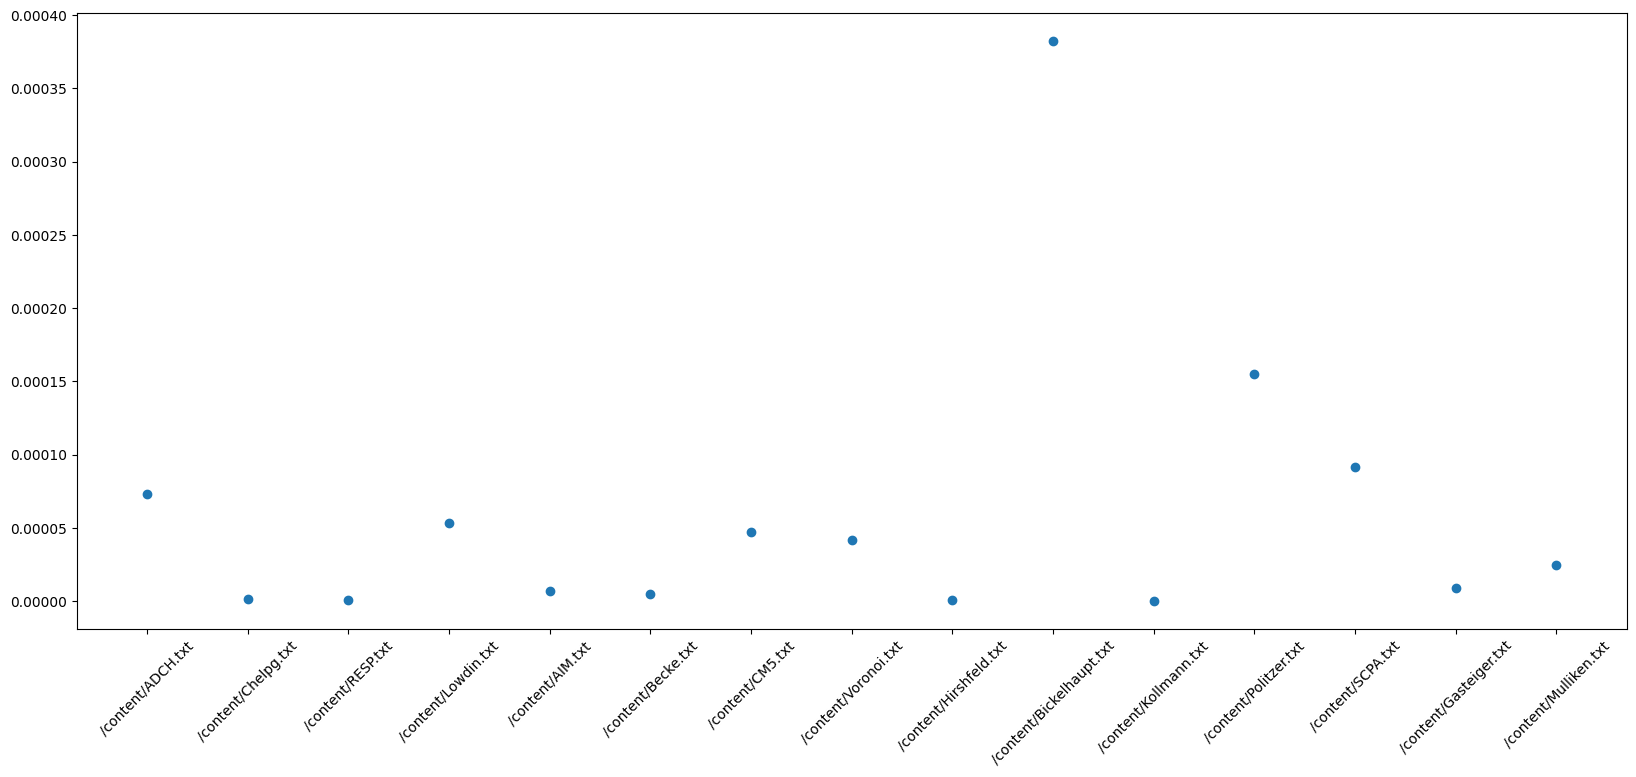

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
# Separar los datos en dos listas
x = [dato[0] for dato in distancias_frobenius if dato[1]!=1.0]
y = [dato[1] for dato in distancias_frobenius if dato[1]!=1.0]

# Crear el gráfico de dispersión
plt.scatter(x, y)
plt.xticks(rotation=45)
# Mostrar el gráfico
plt.show()

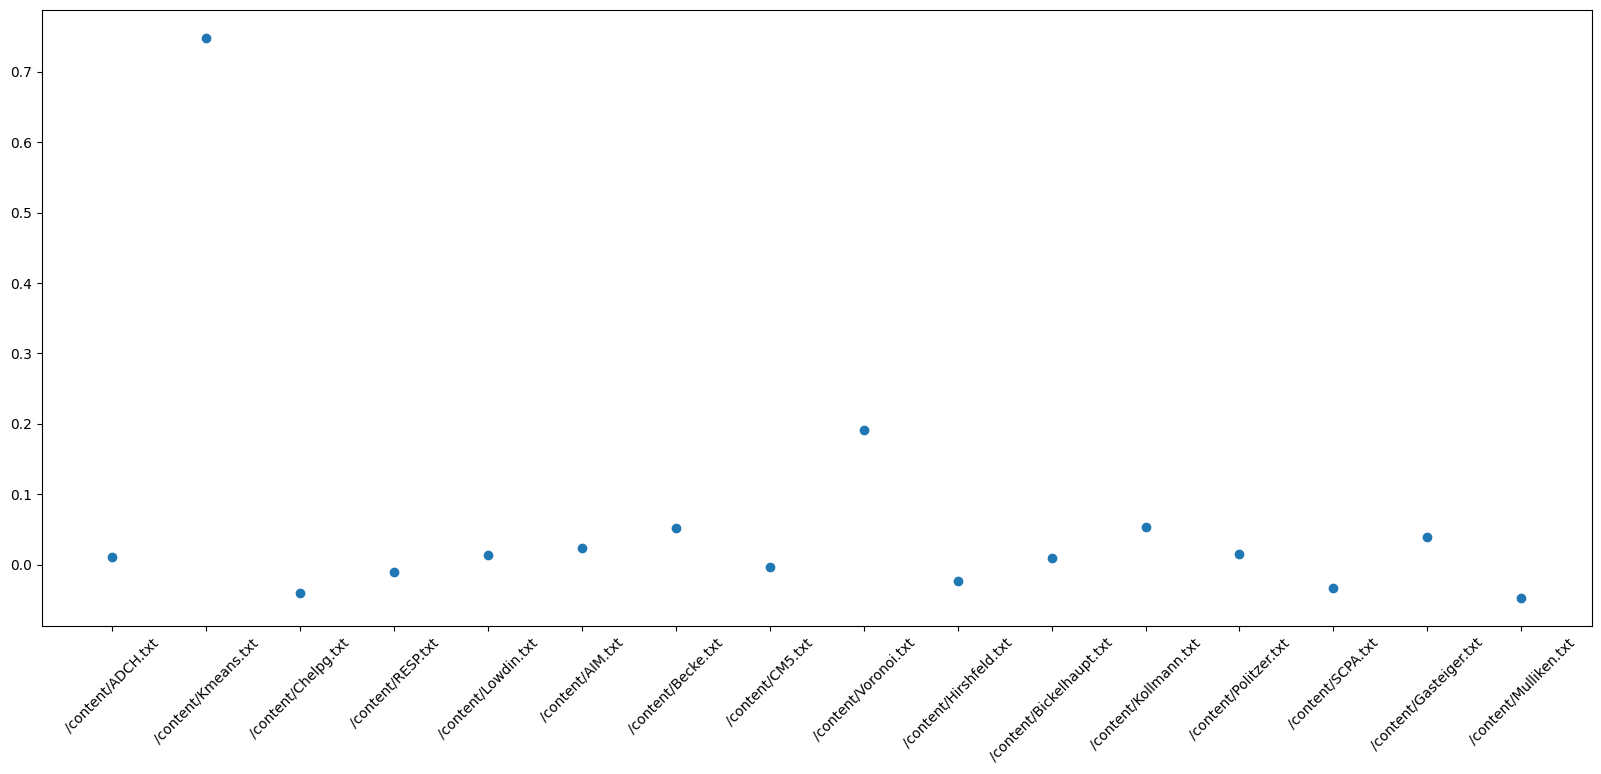

In [26]:
plt.figure(figsize=(20,8))
# Separar los datos en dos listas
x = [dato[0] for dato in coeficientes_cophenet]
y = [dato[1] for dato in coeficientes_cophenet]

# Crear el gráfico de dispersión
plt.scatter(x, y)
plt.xticks(rotation=45)
# Mostrar el gráfico
plt.show()

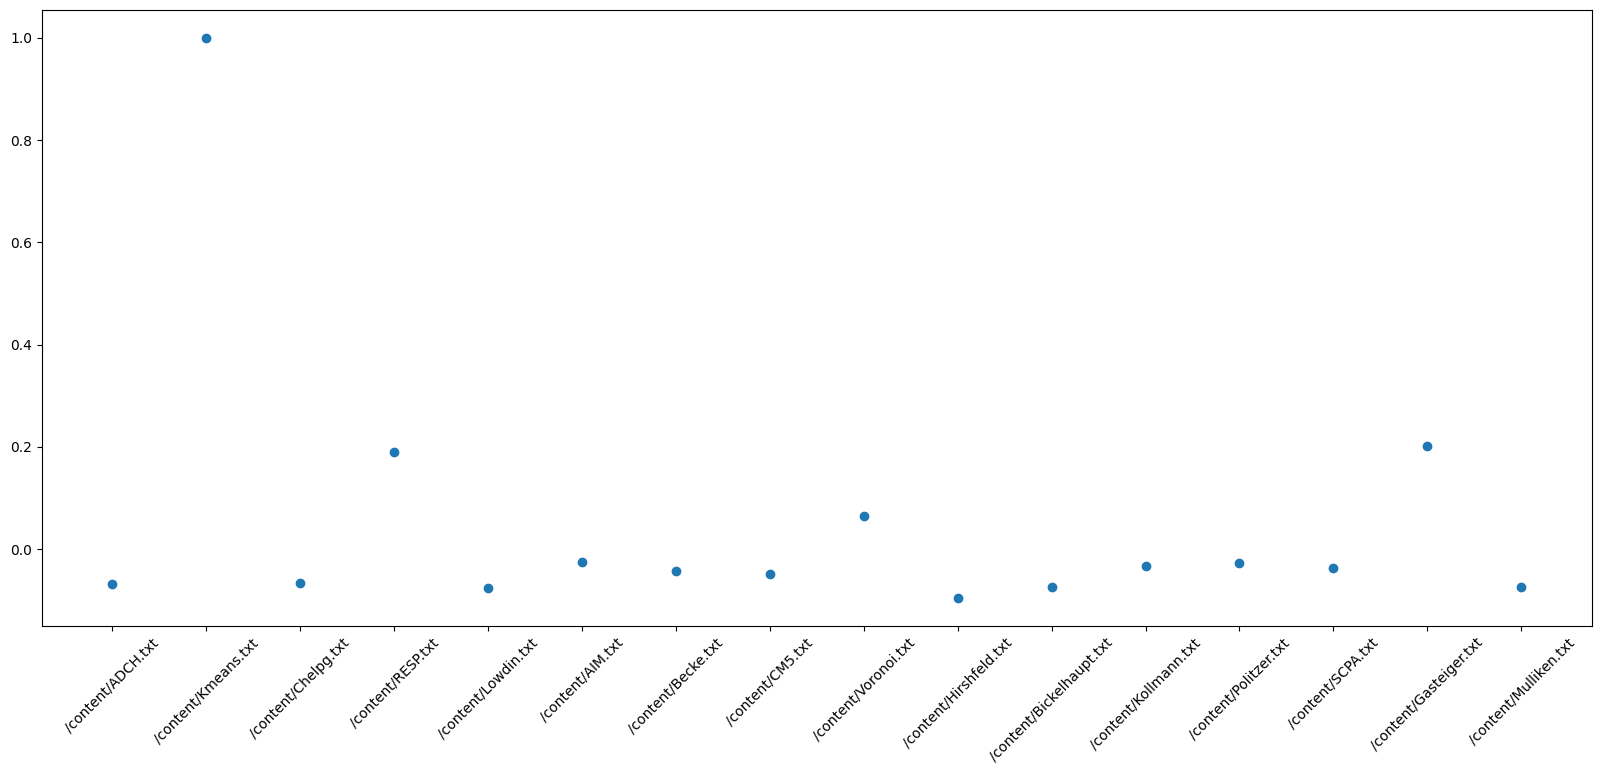

In [9]:
plt.figure(figsize=(20,8))
# Separar los datos en dos listas
x = [dato[0] for dato in correlaciones_mantel]# if dato[1]!=1.0]
y = [dato[1] for dato in correlaciones_mantel]# if dato[1]!=1.0]

# Crear el gráfico de dispersión
plt.scatter(x, y)
plt.xticks(rotation=45)
# Mostrar el gráfico
plt.show()

In [10]:
!pip install ete3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 36.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ete3: filename=ete3-3.1.3-py3-none-any.whl size=2273785 sha256=17b03f1e5ed36b9333cf7417d379e643de369c20f5d46575c79f982b419178a8
  Stored in directory: /root/.cache/pip/wheels/a0/72/00/1982bd848e52b03079dbf800900120bc1c20e92e9a1216e525
Successfully built ete3


In [58]:
from sklearn.metrics import adjusted_rand_score
a = [0,1,2,3,1,2,0]
b=[1,2,2,5,6,6,8]

#No tengo que comparar las distancias si no las etiquetas como tal del dendrograma
prueba_1 = matriz_comparacion.tolist()
#prueba1 = [abs(x) for arr in matriz_comparacion.tolist() for x in arr]
filas, columnas = matriz_comparacion.shape
matriz_absoluta = np.zeros((filas, columnas))

# Aplicar el valor absoluto a cada elemento de la matriz original
for i in range(filas):
    for j in range(columnas):
        matriz_absoluta[i, j] = abs(matriz_comparacion[i, j])
prueba1 = matriz_absoluta.tolist()
print(prueba1)
prueba_2 = matriz_referencia.tolist()

def rand(m1, m2):

  ari_l=[adjusted_rand_score(m1, m2)]
  return ari_l
ari2 = []
for id1, i in enumerate(prueba_2):
  for id2, j in enumerate(prueba1):
    if id1 == id2:
      print(i, j)
      ari2.append(adjusted_rand_score(i, j))

print(ari2)
print(rand(a,b))
# Calcular el ARI
"""print(prueba_1)
print(prueba_2)
ari2 = adjusted_rand_score(prueba_2, prueba_1)
print("ARI:", ari2)"""

[[1.0, 92.3449371462438, 13.435265644898067, 63.607509871420774, 84.62719485260102, 7.548632215501726, 148.70784279855968, 126.99346976929621, 33.84965284762822, 250.76522146430221, 6246.371090687398, 104.77979873755169, 64.16610230518862, 80.88405673597174, 60.07454160981081, 36.7756514774272, 27.079955881033754, 26.060343264496055, 108.89137417026649, 2105.1551711177035, 51.906232443833446], [92.3449371462438, 1.0, 77.90967150134573, 27.73742727482302, 6.717742293642772, 100.89356936174552, 242.0527799448035, 220.33840691554002, 57.49528429861557, 344.110158610546, 6339.716027833641, 11.4348615913079, 157.5110394514324, 174.22899388221555, 153.41947875605462, 54.56928566881659, 64.26498126521004, 65.28459388174774, 202.2363113165103, 2198.500108263947, 39.43870470241035], [13.435265644898067, 77.90967150134573, 1.0, 49.17224422652271, 70.19192920770296, 21.983897860399793, 163.14310844345775, 141.42873541419428, 19.414387202730154, 265.20048710920025, 6260.806356332296, 90.3445330926

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/loc

'print(prueba_1)\nprint(prueba_2)\nari2 = adjusted_rand_score(prueba_2, prueba_1)\nprint("ARI:", ari2)'

In [22]:
from ete3 import Tree

def array_to_newick(array):
    # Crear una cadena Newick con los valores del array
    newick_str = ",".join(str(val) for val in array)
    return f"({newick_str});"

# Convertir las matrices en representación Newick
newick_referencia = array_to_newick(Z_referencia)
newick_comparacion = array_to_newick(Z_comparacion)

# Crear objetos Tree a partir de las representaciones Newick
t1 = Tree(newick_referencia, format=1)
t2 = Tree(newick_comparacion, format=1)

# Establecer una raíz en cada árbol (puedes ajustar los nodos según sea necesario)
t1.set_outgroup(t1.get_leaf_names()[0])
t2.set_outgroup(t2.get_leaf_names()[0])

# Calcular la distancia de Robinson-Foulds
rf = t1.robinson_foulds(t2)[0]

print("Distancia de Robinson-Foulds:", rf)
print("Árbol de referencia:")
print(t1)

print("Árbol de comparación:")
print(t2)




Distancia de Robinson-Foulds: 0
Árbol de referencia:

   /-[0.         1.         4.58257569 2.        ]
  |
  |   /-[2.         3.         4.58257569 2.        ]
  |  |
  |  |--[4.         5.         4.58257569 2.        ]
  |  |
  |  |--[6.         7.         4.58257569 2.        ]
  |  |
  |  |--[8.         9.         4.58257569 2.        ]
  |  |
--|  |--[10.         11.          4.58257569  2.        ]
  |  |
  |  |--[12.         13.          4.58257569  2.        ]
  |  |
  |  |--[14.         15.          4.58257569  2.        ]
  |  |
  |  |--[16.         17.          4.58257569  2.        ]
  |  |
  |  |--[18.         19.          4.58257569  2.        ]
  |  |
   \-|--[20.        30.         6.7634238  3.       ]
     |
     |--[21.         22.          8.90601649  4.        ]
     |
     |--[23.         24.          8.90601649  4.        ]
     |
     |--[25.         26.          8.90601649  4.        ]
     |
     |--[27.         28.          8.90601649  4.        ]
     |
 